# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print ('Pickle files Loaded')

Pickle files Loaded


In [2]:
### To start off let's do a basic data summary.
import random

# get random number between 0 and 12630
x = random.randint(0,12630)

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = train['sizes'][x]

# TODO: how many classes are in the dataset
n_classes = max(train['labels'])+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [41 43]
Number of classes = 43


In [3]:
import scipy
import csv

sign_name = []
class_id = []

#read signnames.csv
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        class_id.append(float(row['ClassId']))
        sign_name.append(row['SignName'])

print (sign_name[:])

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric tons']


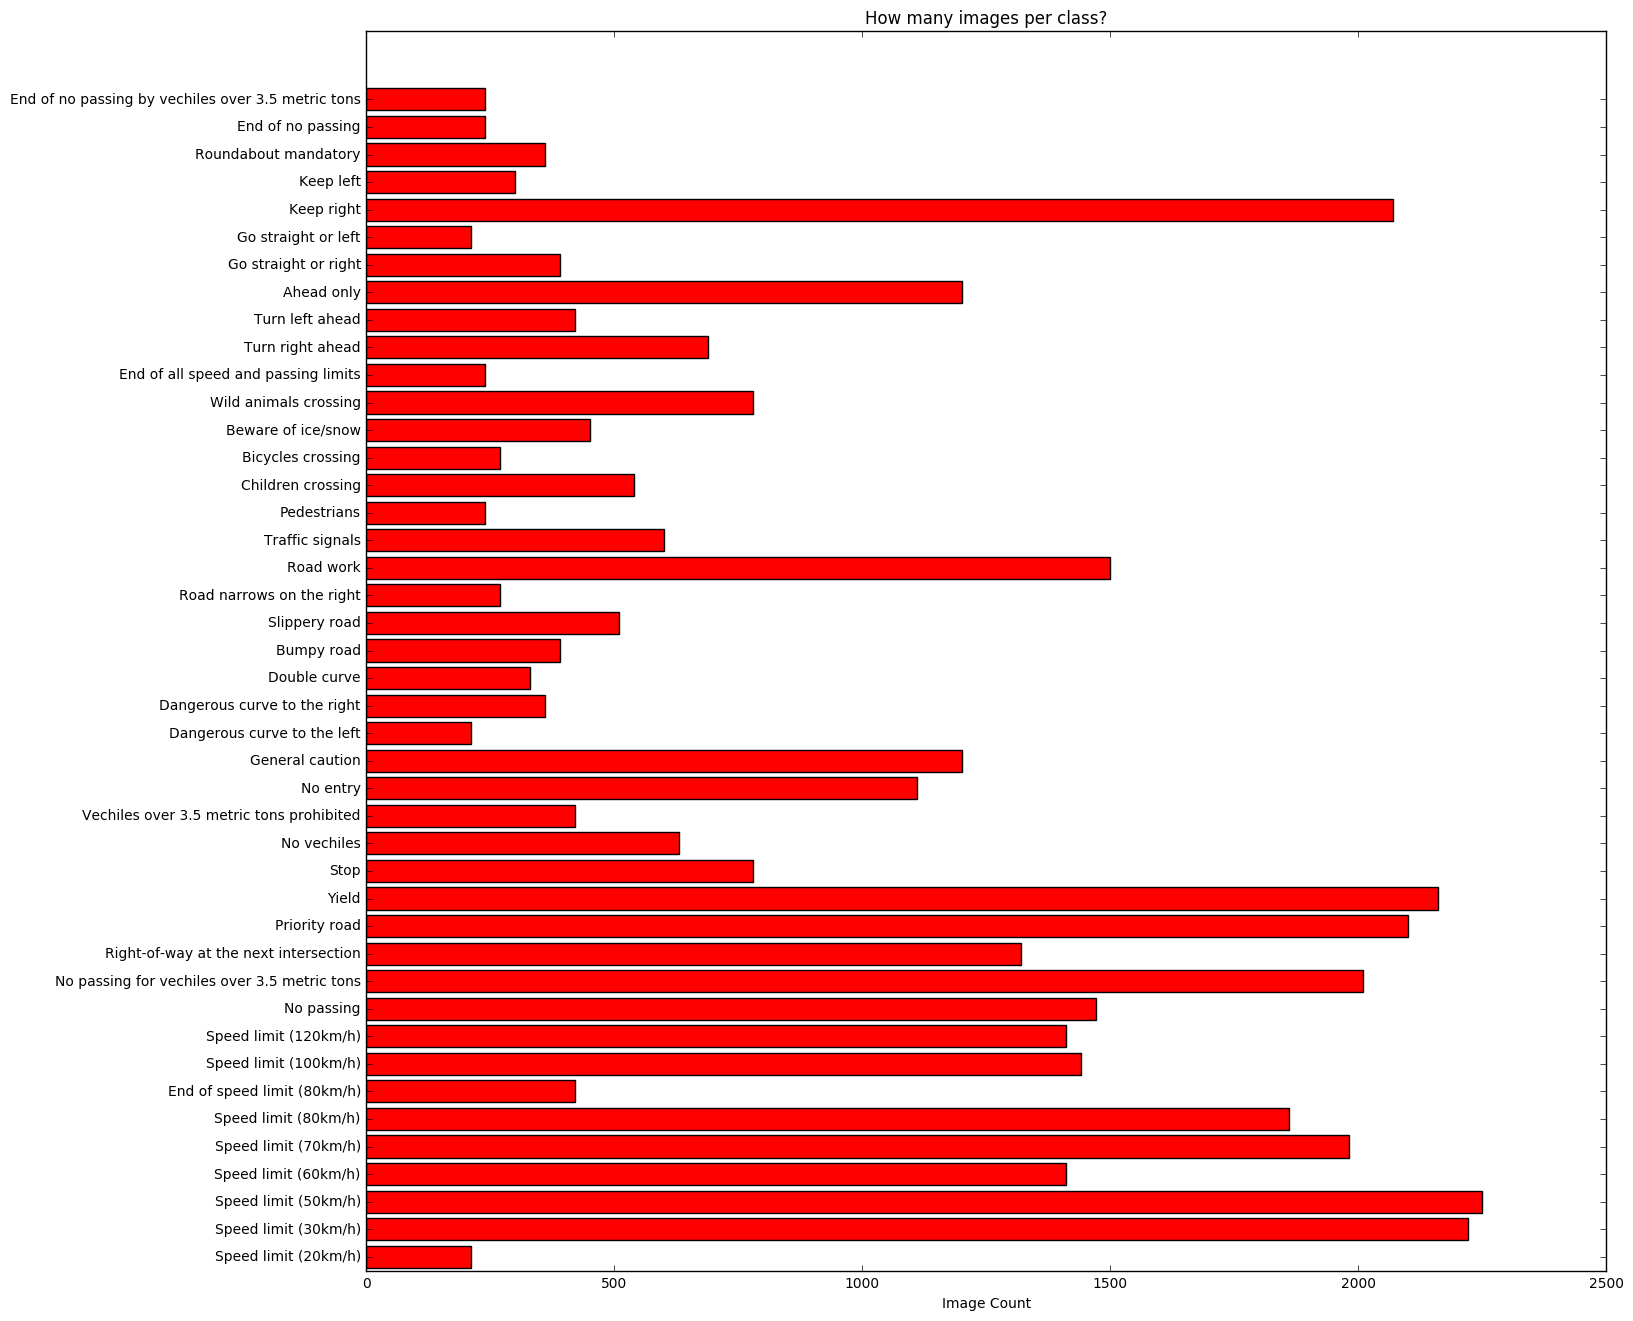

In [4]:
from pylab import *

train_features = np.array(train['features'])
train_labels = np.array(train['labels'])

class_count = np.bincount(train_labels)
pos = arange(43)+.5    # the bar centers on the y axis

figure(111,figsize = (16,16))
barh(pos,class_count, align='center',color='red')
yticks(pos, sign_name,)
xlabel('Image Count')
title('How many images per class?')
#grid(True)

show()


In [6]:
### Helper function - Random Plot images with label in the dataset 
### Credit to vivek yadav on his post, and http://www.hvass-labs.org/.
### Modified to suit any size grid(4x4, 2x5), you name it, and it works for color or glayscale pictures as well.

import matplotlib.gridspec as gridspec

def plot_random(n_row,n_col,X,y):

    plt.figure(figsize = (2*n_col,2*n_row))
    gs1 = gridspec.GridSpec(n_row,n_col)
    gs1.update(wspace=0.3, hspace=0.3) # set the spacing between axes. 

    for i in range(n_row*n_col):
        ax1 = plt.subplot(gs1[i])
        index = np.random.randint(1,len(y))
        plt.imshow(X[index],cmap=cm.Greys_r)
        plt.text(2,4,str(sign_name[y[index]]),color='k',backgroundcolor='y')
        
    plt.show()

ploting random images in train dataset with label......


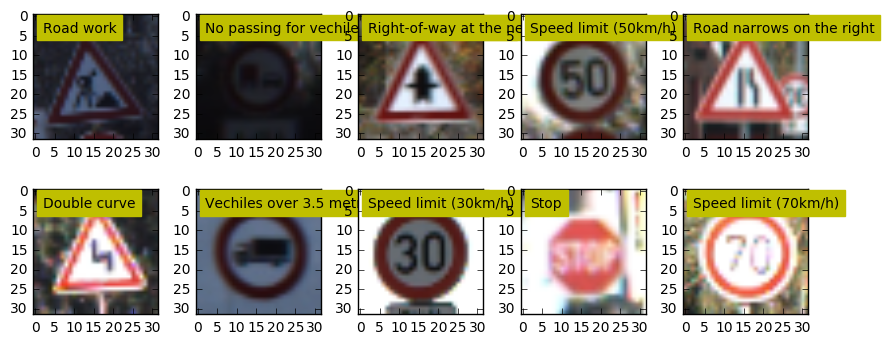

In [7]:
print('ploting random images in train dataset with label......')
plot_random(2,5,X_train,y_train)

ploting random images in test dataset with label......


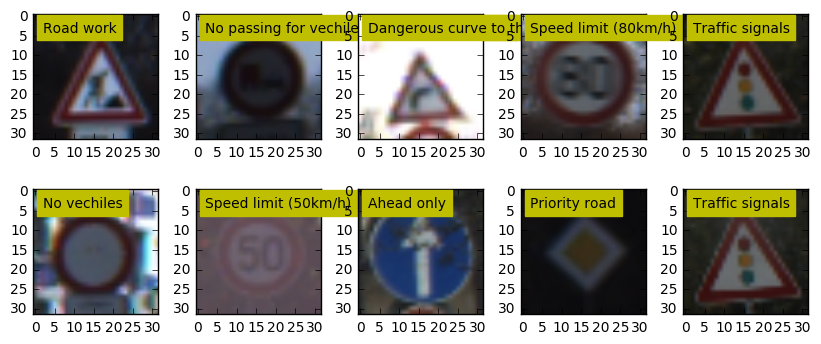

In [8]:
print('ploting random images in test dataset with label......')
plot_random(2,5,X_test,y_test)

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

The above barchart shows "Number of examples per label" in original training dataset. 
Some examples such as (30km/h, 50km/h,Yield,Priority road,Keep right) have over 2700 samples for each label. 
Other examples such as (20km/h, Dangerous Curve to the left, Pedestrians, Go straight or left) have only 250 sample for each label. But those rare signs are equally important for the training. Build self-driving car that can handle school zone, new environment is the biggest challenge. 
There are many ways can try. I choose two here:
* Merge provide train set and test set together, yeild 39209+12630= 51839 real samples
* Rotate the sample image in range +/-20 degrees, generate additional samples for underrepresented classes
  This step will bring those rare samples (such as 20km/h, Pedestrian, etc) up to 2000+ level. 

Then split the total dataset 80:20 for trainset and testset. 
With in the trainset, split 75:25 again for training set and validation set. 
Therefore, I can train the model on 61683 samples, validate on 20562 samples, test on 20562 samples.

In [9]:
print('Merge training set and testing set...')

X_all = np.concatenate((X_train, X_test), axis = 0)
y_all = np.concatenate((y_train, y_test), axis = 0)

print('Merge completed. Number of total samples', len(y_all))

Merge training set and testing set...
Merge completed. Number of total samples 51839


Counting samples per class...


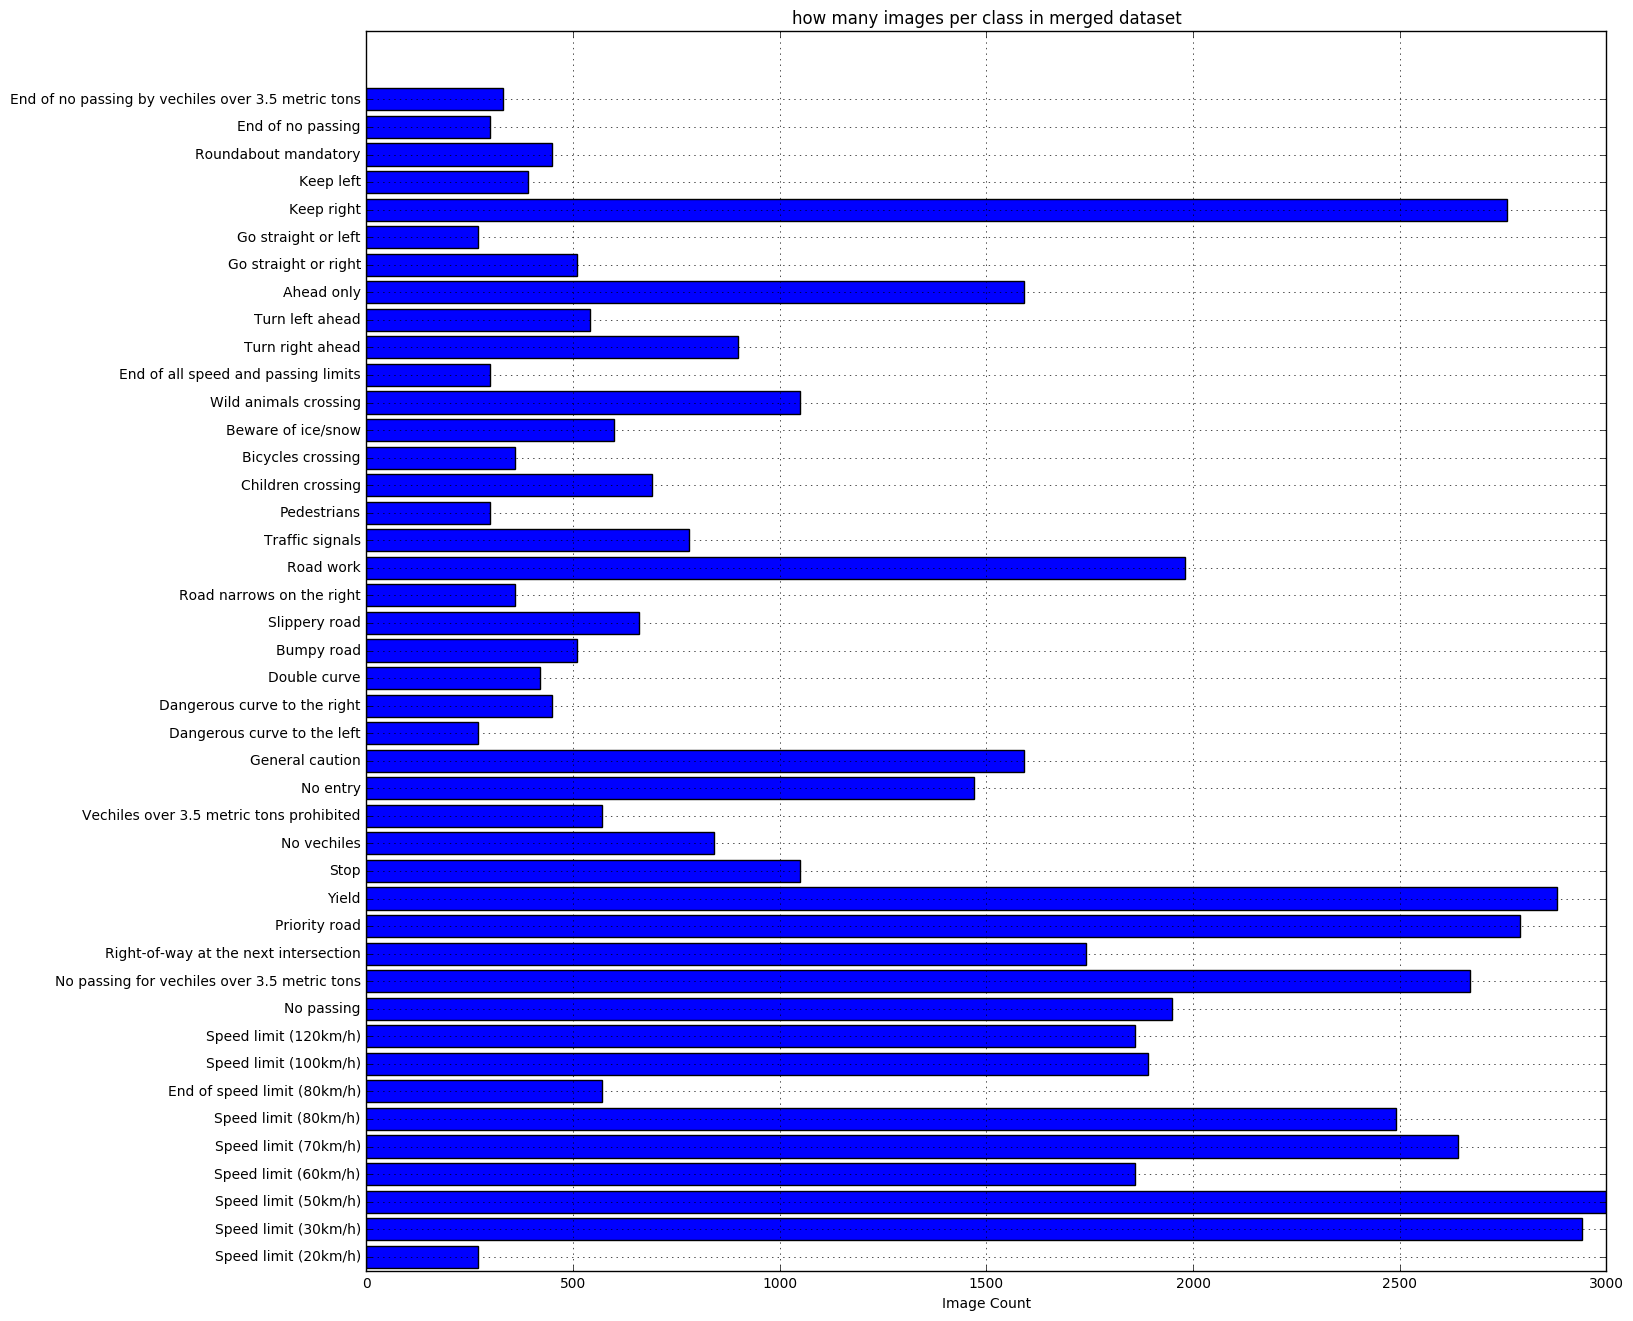

In [10]:
print('Counting samples per class...')
from pylab import *

class_count = np.bincount(y_all)
pos = arange(43)+.5    # the bar centers on the y axis

figure(111,figsize = (16,16))
barh(pos,class_count, align='center',)
yticks(pos, sign_name,)
xlabel('Image Count')
title('how many images per class in merged dataset')
grid(True)

show()

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

I almost doubled the total samples from original 39209+12630= 51839 real samples to total 102807 samples. 

You can see some rotated images are showing. It will take care some cases like camera shaking or place at not perfect angle. For future work, maybe can add tilt, warp and shift to the image. The dataset can be easily grow 5-10 times bigger. 

For this project, I am using 80:20 split on total dataset to get testing set 20562 samples.
Then split the training set 75:25 again to get training set 61683 samples and validation set 20562 samples. 

Even in validation set, the lowest image count per class (such as stop sign) is over 200, greater than "30 rule", I am ok to proceed with these setting.  

In [11]:
### Regenerating images by rotating in between +/-20 degrees. 
### Credit to Mehdi Sqalli https://github.com/MehdiSv/TrafficSignsRecognition/

print('Regenerating data...')

import scipy.ndimage

# Generate additional data for underrepresented classes
print('Generating additional data...')
angles = [-5, 5, -10, 10, -15, 15, -20, 20]

for i in range(len(class_count)):
    input_ratio = min(int(np.max(class_count) / class_count[i]) - 1, len(angles) - 1)

    if input_ratio <= 1:
        continue

    new_features = []
    new_labels = []
    mask = np.where(y_all == i)

    for j in range(input_ratio):
        for feature in X_all[mask]:
            new_features.append(scipy.ndimage.rotate(feature, angles[j], reshape=False))
            new_labels.append(i)

    X_all = np.append(X_all, new_features, axis=0)
    y_all = np.append(y_all, new_labels, axis=0)

print('Regenarating data completed. Number of total samples', len(y_all))

Regenerating data...
Generating additional data...
Regenarating data completed. Number of total samples 102807


Counting samples per class...


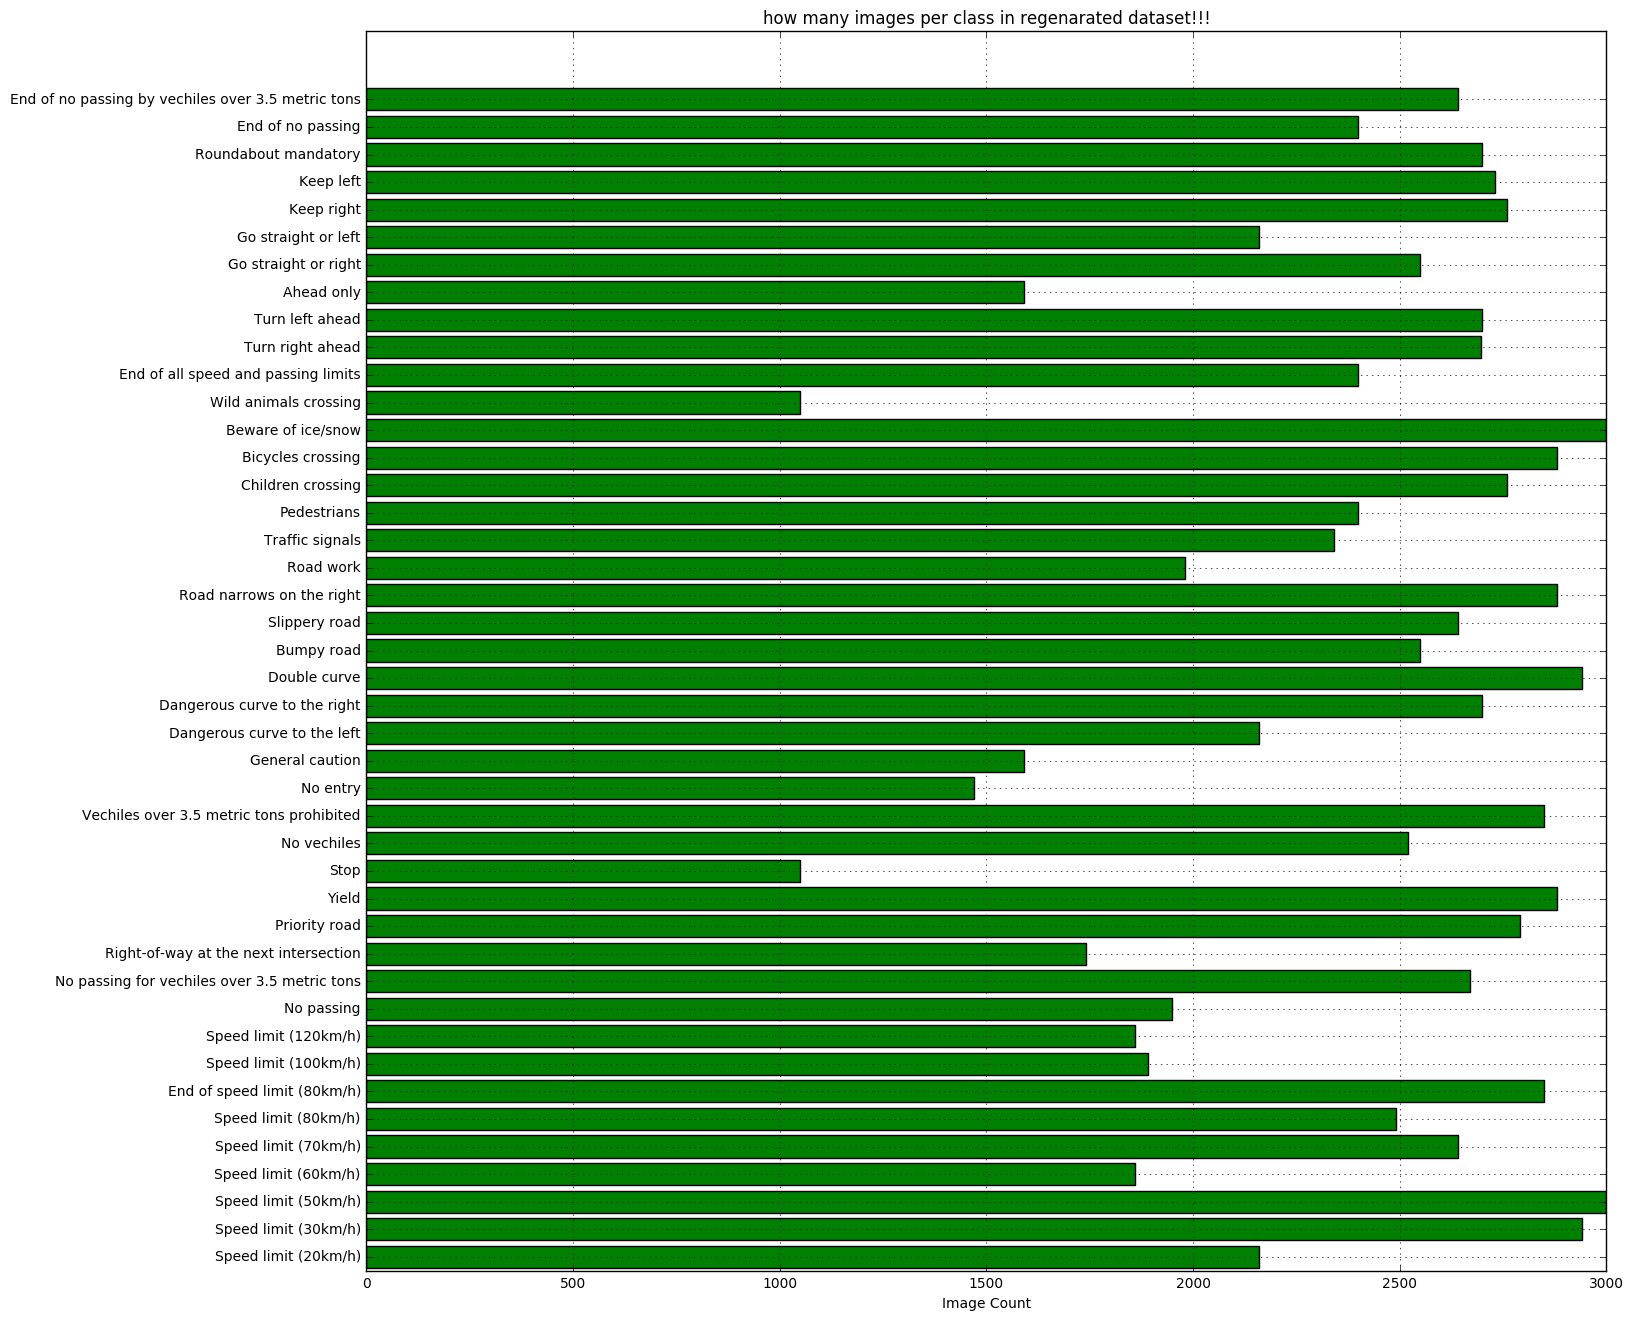

In [12]:
print('Counting samples per class...')
from pylab import *

class_count = np.bincount(y_all)
pos = arange(43)+.5    # the bar centers on the y axis

figure(111,figsize = (16,16))
barh(pos,class_count, align='center',color='green')
yticks(pos, sign_name,)
xlabel('Image Count')
title('how many images per class in regenarated dataset!!!')
grid(True)

show()

In [13]:
from sklearn.utils import shuffle

X_all, y_all = shuffle(X_all, y_all)

In [14]:
print('splitting the total data into training/validation/testing sets...')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, stratify = y_all )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify = y_train )
print('Number of training samples and size', X_train.shape)
print('Number of validation samples and size', X_val.shape)
print('Number of testing samples and size', X_test.shape)

splitting the total data into training/validation/testing sets...
Number of training samples and size (61683, 32, 32, 3)
Number of validation samples and size (20562, 32, 32, 3)
Number of testing samples and size (20562, 32, 32, 3)


The lowest count samples(such as stop and Wild animals crossing) are over 1000, I think that is enough to proceed. 
Shuffle the data again and display: 

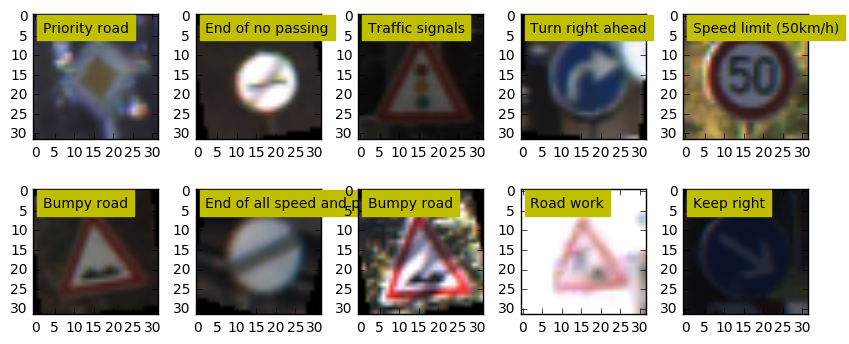

In [15]:
plot_random(2,5,X_train,y_train)

In [16]:
#importing some useful packages, use opencv to convert color image to grayscale, also change size to 32x32. 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

def pre_process_image(image):
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    
    return image

In [17]:
###
print('Processing Image from RGB color to grayscale, resize to 32x32, save into tensor friendly array format... ')

img_resize = 32
N_classes = 43
image_shape = (img_resize,img_resize)
img_size_flat = img_resize*img_resize


X_train = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
X_test = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)
X_val = np.array([pre_process_image(X_val[i]) for i in range(len(X_val))],
                          dtype = np.float32)

print('Processing Done.')

Processing Image from RGB color to grayscale, resize to 32x32, save into tensor friendly array format... 
Processing Done.


In [18]:
###Flatten all image into 2d array:

X_train = X_train.reshape((-1, 32, 32, 1))
X_val = X_val.reshape((-1, 32, 32, 1))
X_test  = X_test.reshape((-1, 32, 32, 1))
print (X_train.shape)
print (X_val.shape)
print (X_test.shape)

(61683, 32, 32, 1)
(20562, 32, 32, 1)
(20562, 32, 32, 1)


In [19]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

Counting samples per class...


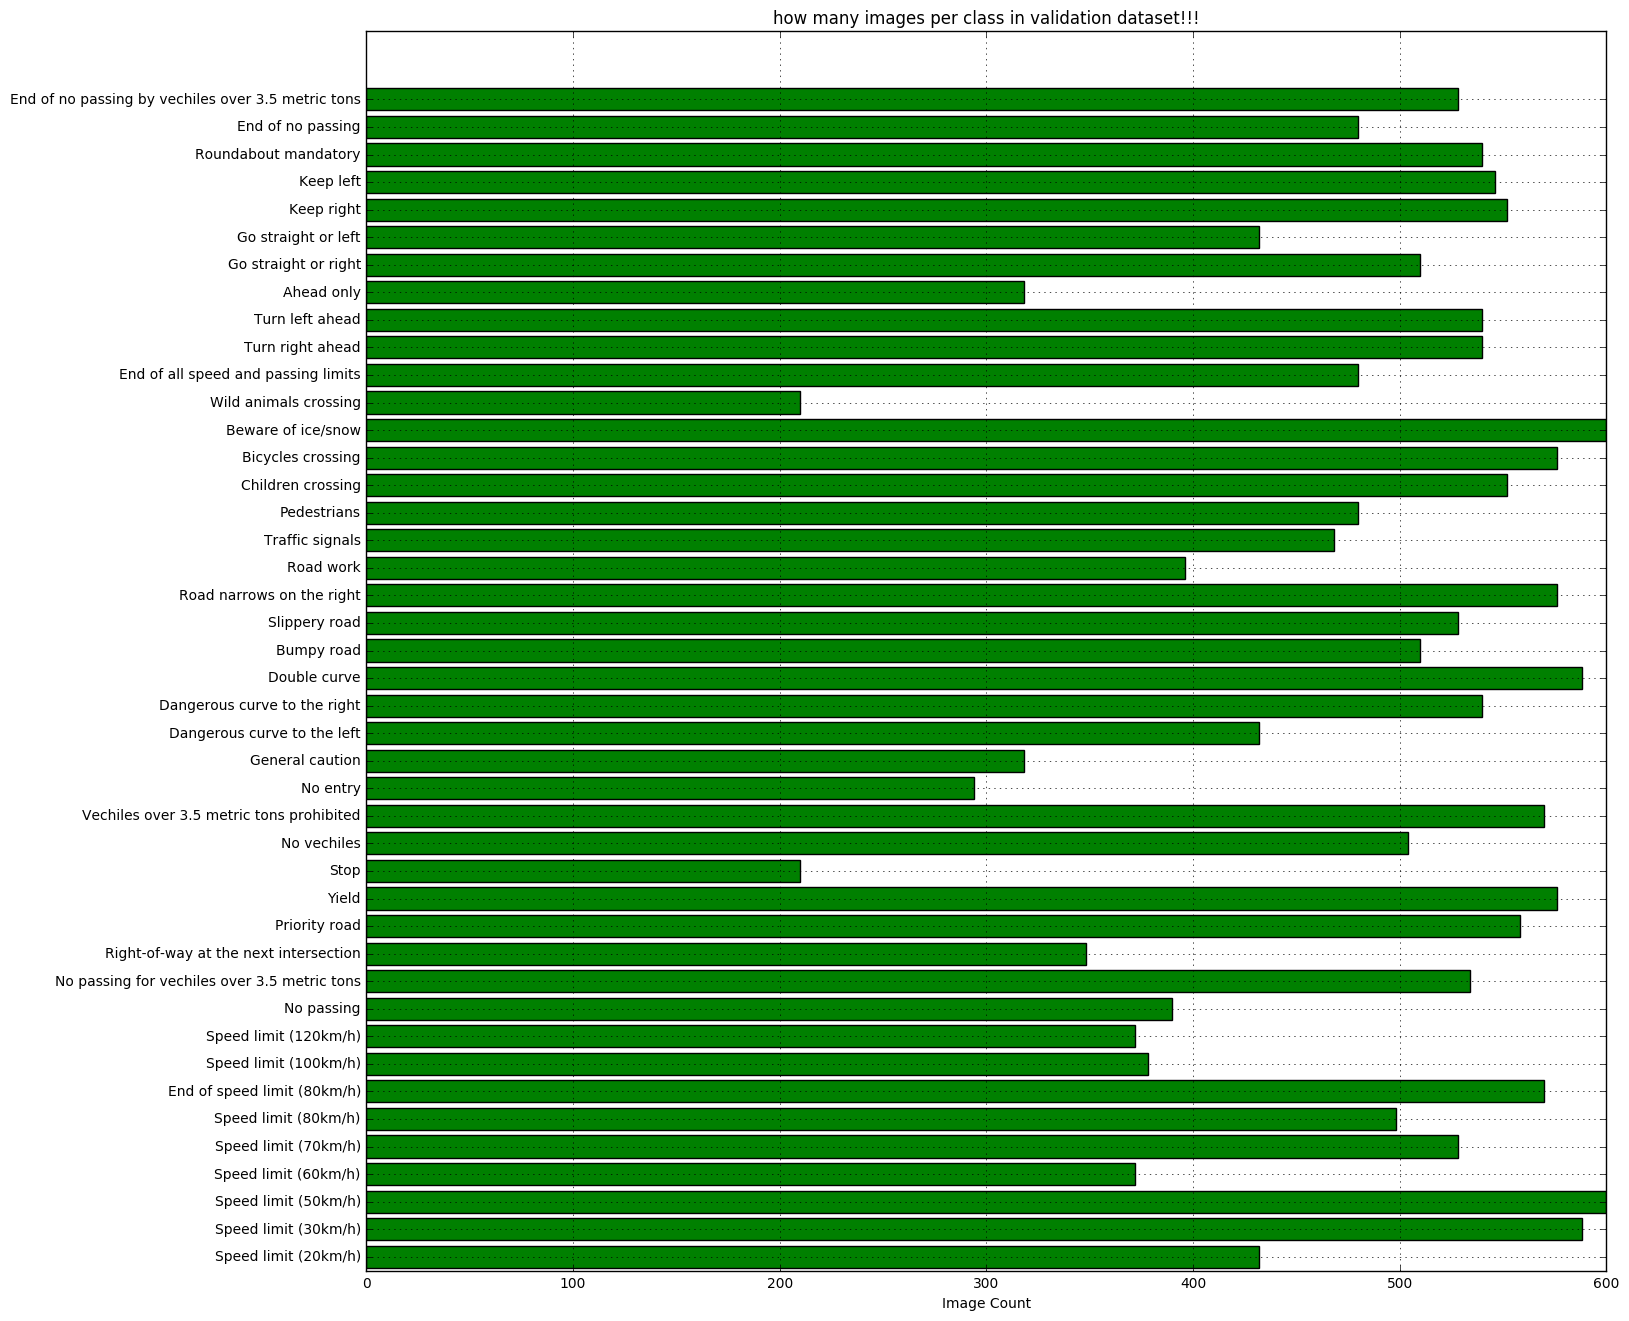

In [20]:
print('Counting samples per class...')
from pylab import *

class_count = np.bincount(y_val)
pos = arange(43)+.5    # the bar centers on the y axis

figure(111,figsize = (16,16))
barh(pos,class_count, align='center',color='green')
yticks(pos, sign_name,)
xlabel('Image Count')
title('how many images per class in validation dataset!!!')
grid(True)

show()

In [21]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [22]:
from keras.utils import np_utils
print('Reformat labels into tensorflow friendly one hot format')

y_val = np_utils.to_categorical(y_val, 43)
y_train = np_utils.to_categorical(y_train, 43)
y_test = np_utils.to_categorical(y_test, 43)

print("Training label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Testing label shape",y_test.shape)


Using TensorFlow backend.


Reformat labels into tensorflow friendly one hot format
Training label shape (61683, 43)
Validation label shape (20562, 43)
Testing label shape (20562, 43)


In [23]:
print('Check the one hot format:',y_test[2500:2501])

Check the one hot format: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


In [24]:
print('Convert the one hot value back to class',np.argmax(y_test[2500:2501],axis=1))

Convert the one hot value back to class [33]


All label sets are converted to one-hot format.
All sample set data types are converted to astype('float32') to match tensorflow placeholder format. 
All sample values are normalized to between value 0 to 1. Different premeters (such as array = array /255 * 0.8 + 0.1) and other formular are tried. The current one is better, and recommand by the Udacity course. For future work, maybe different normalization rated samples can also use for training, validation and testing. The dataset can be easily grow bigger. 

In [25]:
print('Normalizing all three sample datasets...')
def norm(array):
    array = array.astype('float32')
    array = array / 255 - 0.5
    return array

X_train = norm(X_train)
X_val = norm(X_val)
X_test = norm(X_test)

print("Training data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Testing data shape",X_test.shape)

Normalizing all three sample datasets...
Training data shape (61683, 32, 32, 1)
Validation data shape (20562, 32, 32, 1)
Testing data shape (20562, 32, 32, 1)


In [26]:
print('Check the data format:',X_train[10])

Check the data format: [[[ 0.06862748]
  [ 0.06862748]
  [ 0.06078434]
  ..., 
  [ 0.07647061]
  [ 0.07647061]
  [ 0.07647061]]

 [[ 0.06470591]
  [ 0.06862748]
  [ 0.06078434]
  ..., 
  [ 0.07254905]
  [ 0.07647061]
  [ 0.08039218]]

 [[ 0.06470591]
  [ 0.06470591]
  [ 0.06078434]
  ..., 
  [ 0.07254905]
  [ 0.07647061]
  [ 0.06862748]]

 ..., 
 [[ 0.13921571]
  [ 0.14313728]
  [ 0.15098041]
  ..., 
  [ 0.08039218]
  [ 0.07647061]
  [ 0.06862748]]

 [[ 0.127451  ]
  [ 0.14705884]
  [ 0.16274512]
  ..., 
  [ 0.09215689]
  [ 0.09215689]
  [ 0.07647061]]

 [[ 0.14313728]
  [ 0.15098041]
  [ 0.17058825]
  ..., 
  [ 0.10392159]
  [ 0.10000002]
  [ 0.09607846]]]


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My network architecture is inspired by the Lenet-5. 

- The input layer is 32x32x1, 1024 inputs. 
- The first convolution layer has 6 5x5 filters, strides are set to 1 in all dimensions, 'VALID' padding, no pulling. The output shape=(?, 28, 28, 6).
- Follow by max pooling, ksize =2x2, strides = 2, 'VALID' padding. The output shape down to (?, 14, 14, 6). 
- Follow by convolution layer2, with 16 5X5 filters, strides=1,'VALID' padding. Output (?, 10, 10, 16).
- Next apply a flatten layer, yield 10x10x16 = 1600 features output.
- Then connect to 120 output layer, then 43 output layer. 

- All activation use "relu" function. 
- The 43 output layer link to softmax, to provide prediction output.
- Prediction compare with labeled input, cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true).
- Cost function use tf.reduce_mean(cross_entropy).
- Optimizer use tf.train.AdamOptimizer(learning_rate=0.008).minimize(cost).


In [27]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
tf.__version__

'0.12.0-rc0'

In [28]:
### Set placeholders, makesure the format match the pre-processed data:

x = tf.placeholder(tf.float32, shape=[None, 32,32,1,], name='x')
#x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, 43], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

In [29]:
# Convolution Layer 1. Input = 32x32x1. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), stddev=0.05))
conv1_b = tf.Variable(tf.zeros(6))
conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# Activation 1.
conv1 = tf.nn.relu(conv1)

In [30]:
conv1

<tf.Tensor 'Relu:0' shape=(?, 28, 28, 6) dtype=float32>

In [31]:
# Pooling Layer 1. Input = 28x28x6. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [32]:
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 6) dtype=float32>

In [33]:
# Convolution Layer 2. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16)))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

In [34]:
# Activation 2.
conv2 = tf.nn.relu(conv2)

In [35]:
conv2

<tf.Tensor 'Relu_1:0' shape=(?, 10, 10, 16) dtype=float32>

In [36]:
# Pooling Layer 2. Input = 10x10x16. Output = 5x5x16.
#conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [37]:
# Flatten Layer.
fc1 = flatten(conv2)
fc1_shape = (fc1.get_shape().as_list()[-1], 120)

In [38]:
fc1

<tf.Tensor 'Flatten/Reshape:0' shape=(?, 1600) dtype=float32>

In [39]:
# Fully Connected Layer 1. Input = 5x5x16. Output = 120.
fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape)))
fc1_b = tf.Variable(tf.zeros(120))
fc1   = tf.matmul(fc1, fc1_W) + fc1_b

In [40]:
fc1

<tf.Tensor 'add_2:0' shape=(?, 120) dtype=float32>

In [41]:
# Activation fc1.
fc1 = tf.nn.relu(fc1)

In [42]:
# Fully Connected Layer 2. Input = 120. Output = 43.
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 43)))
fc2_b  = tf.Variable(tf.zeros(43))
logits = tf.matmul(fc1, fc2_W) + fc2_b

In [43]:
logits

<tf.Tensor 'add_3:0' shape=(?, 43) dtype=float32>

In [44]:
y_pred = tf.nn.softmax(logits)

In [45]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [46]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)

In [47]:
cost = tf.reduce_mean(cross_entropy)

In [48]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.008).minimize(cost)

In [49]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [50]:
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [51]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy, total_loss = 0, 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy =  sess.run([cost, accuracy_op], feed_dict={x: batch_x, y_true: batch_y})
        total_accuracy += (accuracy * batch_x.shape[0])
        total_loss     += (loss * batch_x.shape[0])
    return total_loss / num_examples, total_accuracy / num_examples

In [52]:
### Train your model here.
### Feel free to use as many code cells as needed.


In [53]:
import time
from datetime import timedelta
import os

EPOCHS = 50
BATCH_SIZE = 256
# saving check point variable
LOGDIR = './save'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        # Start-time used for printing time-usage below.
        start_time = time.time()
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(optimizer, feed_dict={x: batch_x, y_true: batch_y})
            
        validation_loss, validation_accuracy = evaluate(X_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation Loss     = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        # Ending time.
        end_time = time.time()

        # Difference between start and end-times.
        time_dif = end_time - start_time

        # Print the time-usage.
        print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
        print()
    
    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Loss     = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    if not os.path.exists(LOGDIR):
        os.makedirs(LOGDIR)
    checkpoint_path = os.path.join(LOGDIR, "lvenn")
    filename = saver.save(sess, checkpoint_path)
    print("Model saved in file: %s" % filename)
    

Training...

EPOCH 1 ...
Validation Loss     = 3.303
Validation Accuracy = 0.145
Time usage: 0:00:21

EPOCH 2 ...
Validation Loss     = 0.917
Validation Accuracy = 0.751
Time usage: 0:00:21

EPOCH 3 ...
Validation Loss     = 0.639
Validation Accuracy = 0.825
Time usage: 0:00:21

EPOCH 4 ...
Validation Loss     = 0.509
Validation Accuracy = 0.862
Time usage: 0:00:21

EPOCH 5 ...
Validation Loss     = 0.447
Validation Accuracy = 0.879
Time usage: 0:00:21

EPOCH 6 ...
Validation Loss     = 0.399
Validation Accuracy = 0.896
Time usage: 0:00:21

EPOCH 7 ...
Validation Loss     = 0.366
Validation Accuracy = 0.909
Time usage: 0:00:21

EPOCH 8 ...
Validation Loss     = 0.311
Validation Accuracy = 0.923
Time usage: 0:00:21

EPOCH 9 ...
Validation Loss     = 0.319
Validation Accuracy = 0.923
Time usage: 0:00:21

EPOCH 10 ...
Validation Loss     = 0.287
Validation Accuracy = 0.931
Time usage: 0:00:21

EPOCH 11 ...
Validation Loss     = 0.292
Validation Accuracy = 0.934
Time usage: 0:00:21

EPOCH 

In [54]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save/lvenn")

In [55]:
evaluate(X_test, y_test)

(0.366157819388233, 0.97578056618555342)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
My optimizer = tf.train.AdamOptimizer(learning_rate=1e-2).minimize(cost)
I pick the learning_rate=0.008 is balancing the CPU training speed and accuracy outbut.
The batch size = 256, Epoch = 50, it yeild about 97.5% accurcy on test set.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**
I kind realize more parameters in the network yield higher accurcy, but cost more to train the model. 
The LeNet-5 has perfect 32x32 input shape, so I choose to keep the samilar structure. I skipped second max pooling layer because it drop down the feature too much. With pooling the output is 400 features, without this layer, output 10x10x16 = 1600 features.  


In [56]:
top_five = tf.nn.top_k(y_pred, k=5, sorted=True, name=None)
i_k5 = np.random.randint(1,len(y_test))
k5 = sess.run([top_five], feed_dict={x:X_test[i_k5-1:i_k5], y_true: y_test[i_k5-1:i_k5]})
print(k5[0][0][-1])
print(k5[0][1][-1])
print(np.argmax(y_test[i_k5-1:i_k5],axis=1))

[  1.00000000e+00   9.12857668e-39   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
[10  5  0  1  2]
[10]


Check certainty for each prediction


/home/tfbox/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


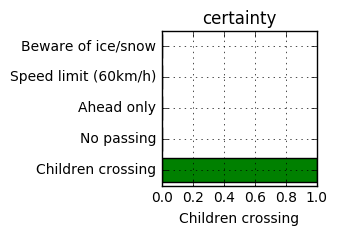

In [58]:
print('Check certainty for each prediction')
from pylab import *
top_five = tf.nn.top_k(y_pred, k=5, sorted=True, name=None)
pos_k5 = arange(5)+.5    # the bar centers on the y axis
i_k5 = np.random.randint(1,len(y_test)+1)
k5 = sess.run([top_five], feed_dict={x:X_test[i_k5-1:i_k5], y_true: y_test[i_k5-1:i_k5]})
pic = np.argmax(y_test[i_k5-1:i_k5],axis=1)
k_five = [sign_name[k5[0][1][-1][0]],
          sign_name[k5[0][1][-1][1]],
          sign_name[k5[0][1][-1][2]],
          sign_name[k5[0][1][-1][3]],
          sign_name[k5[0][1][-1][4]]]

figure(111,figsize = (2,2))
barh(pos_k5,k5[0][0][-1], align='center',color='green')
#yticks(pos_k5,k5[0][1][-1],)
yticks(pos_k5,k_five)
xlabel(sign_name[np.argmax(y_test[i_k5-1:i_k5],axis=1)])
title('certainty')
grid(True)

show()

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

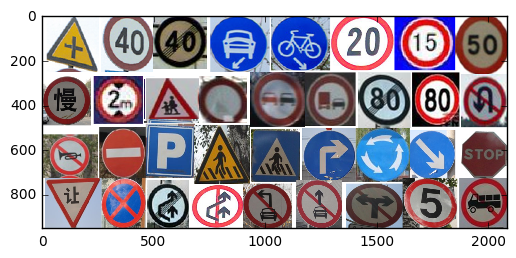

In [59]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#reading in an image
image1 = mpimg.imread('JEI_22_4_041105_f010.png')
image2 = mpimg.imread('images.jpeg')
image3 = mpimg.imread('3230065-building-site-with-traffic-signs.jpg')
image4 = mpimg.imread('onlineImage.jpeg')
image5 = mpimg.imread('images2.jpeg')
#printing out some stats and plotting
#print('This image is:', type(image), 'with dimesions:', image.shape)
#plt.imshow(image1) 
plt.imshow(image1) 

created new picture set


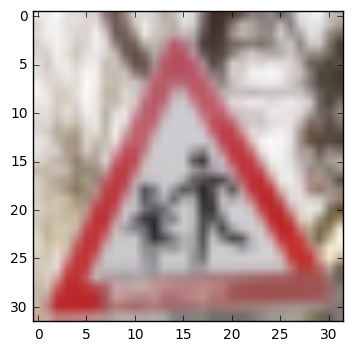

In [60]:
import scipy.misc
#image_list = [[0,240,0,240],[500,735,1650,1880],[500,735,1850,2085],[0,260,1850,2085],[0,240,240,490],[230,480,960,1200],[230,464,468,708],[500,735,230,470],[500,732,1847,2085],[713,951,230,468]]
image_list = [[0,140,90,250]]
X_new = []
#y_new = []

for i in range(len(image_list)):
    crop = image2[image_list[i][0]:image_list[i][1],image_list[i][2]:image_list[i][3]]
    resize = scipy.misc.imresize((crop), [32, 32])
    X_new.append(resize)
    #y_new.append(28)
    plt.imshow(resize) 
    
print ('created new picture set')

created new picture set


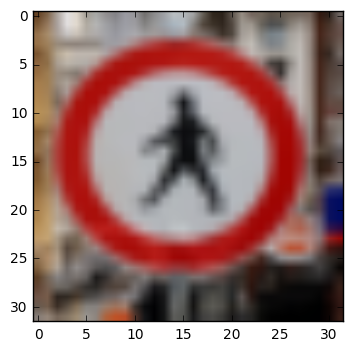

In [61]:
import scipy.misc
#image_list = [[0,240,0,240],[500,735,1650,1880],[500,735,1850,2085],[0,260,1850,2085],[0,240,240,490],[230,480,960,1200],[230,464,468,708],[500,735,230,470],[500,732,1847,2085],[713,951,230,468]]
#image_list = [[0,140,90,250]]
image_list = [[80,340,0,300],[90,320,300,520],[80,320,530,755]]

#X_new =[]
for i in range(len(image_list)):
    crop = image3[image_list[i][0]:image_list[i][1],image_list[i][2]:image_list[i][3]]
    resize = scipy.misc.imresize((crop), [32, 32])
    X_new.append(resize)
    #y_new.append(27)
    plt.imshow(resize) 
    
print ('created new picture set')

created new picture set


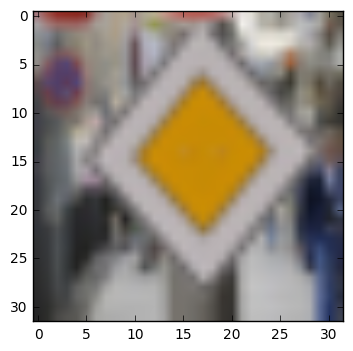

In [62]:
import scipy.misc
#image_list = [[0,240,0,240],[500,735,1650,1880],[500,735,1850,2085],[0,260,1850,2085],[0,240,240,490],[230,480,960,1200],[230,464,468,708],[500,735,230,470],[500,732,1847,2085],[713,951,230,468]]
#image_list = [[0,140,90,250]]
#image_list = [[80,340,0,300],[90,320,300,520],[80,320,530,755]]
image_list = [[50,140,150,250],[130,230,150,250]]

#X_new =[]
for i in range(len(image_list)):
    crop = image4[image_list[i][0]:image_list[i][1],image_list[i][2]:image_list[i][3]]
    resize = scipy.misc.imresize((crop), [32, 32])
    X_new.append(resize)
    #y_new.append(12)
    plt.imshow(resize) 
    
print ('created new picture set')

created new picture set


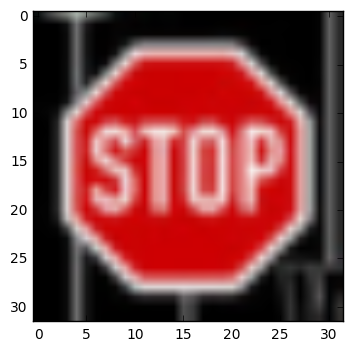

In [63]:
import scipy.misc
#image_list = [[0,240,0,240],[500,735,1650,1880],[500,735,1850,2085],[0,260,1850,2085],[0,240,240,490],[230,480,960,1200],[230,464,468,708],[500,735,230,470],[500,732,1847,2085],[713,951,230,468]]
image_list = [[85,155,95,165]]

#X_new = []

for i in range(len(image_list)):
    crop = image5[image_list[i][0]:image_list[i][1],image_list[i][2]:image_list[i][3]]
    resize = scipy.misc.imresize((crop), [32, 32])
    X_new.append(resize)
    #y_new.append(14)
    plt.imshow(resize) 
    
print ('created new picture set')

In [64]:
y_new =[28,25,17,27,1,12,14]

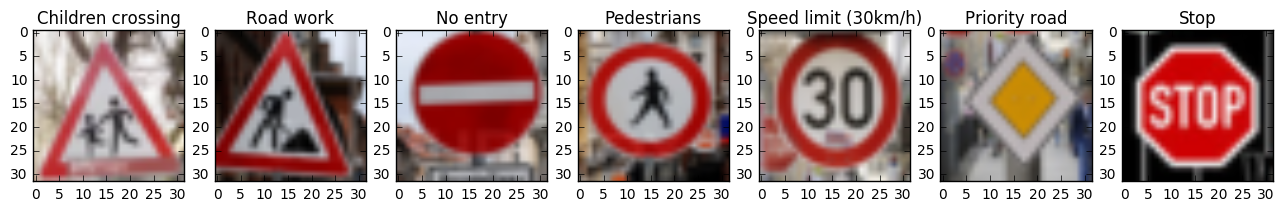

In [65]:
import random

#for line in image_show:
image_show = 7
fig, ax = plt.subplots(1,image_show,figsize=(16,2))
for k in range(image_show):
    #show = random.randint(0,len(X_new))
    #resize = scipy.misc.imresize((X_new[k]), [32, 32])
    ax[k].imshow(X_new[k])
    ax[k].set_title(str(sign_name[y_new[k]]))
    
        
plt.show()


In [66]:
###
print('Processing Image from RGB color to grayscale, resize to 32x32, save into tensor friendly array format... ')

img_resize = 32
N_classes = 43
image_shape = (img_resize,img_resize)
img_size_flat = img_resize*img_resize


X_new = np.array([pre_process_image(X_new[i]) for i in range(len(X_new))],
                          dtype = np.float32)
X_new = X_new.reshape((-1, 32, 32, 1))

print('Processing Done.',X_new.shape)

Processing Image from RGB color to grayscale, resize to 32x32, save into tensor friendly array format... 
Processing Done. (7, 32, 32, 1)


In [67]:
print('Normalizing samples data...')
def norm(array):
    array = array.astype('float32')
    array = array / 255-0.5
    return array

X_new = np.array(X_new)

X_new = norm(X_new)
#X_val = norm(X_val)
#X_test = norm(X_test)

print("New data shape",X_new.shape)
#print("Validation data shape",X_val.shape)
#print("Testing data shape",X_test.shape)

Normalizing samples data...
New data shape (7, 32, 32, 1)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [73]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
top_five = tf.nn.top_k(y_pred, k=5, sorted=True, name=None)
i_k5 = np.random.randint(1,len(X_new))
#k_five = sess.run([top_five], feed_dict={x:X_test[i_k5-1:i_k5], y_true: y_test[i_k5-1:i_k5]})
k_five = sess.run([top_five], feed_dict={x:X_new[i_k5-1:i_k5]})
print(k_five[0][0][-1])
print(k_five[0][1][-1])
print(y_new[i_k5-1])

[  1.00000000e+00   3.23293108e-08   4.66501452e-18   1.00087087e-21
   2.95446799e-34]
[25 38 26 36 18]
25


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

On the splitted testset, the model performed 0.9785 accuracy on 20562 samples. 
But on the new test sample, as shown, two signs are wrong. 
One it never see before, the model picked the blue color background and orientation of the lines. 
The wild animals crossing is worry, it is human crossing. The model pick up the triangle shape, white background, and something walking. Whatever, if the car make stop and wait descion, it will be right. 

Check certainty for each prediction


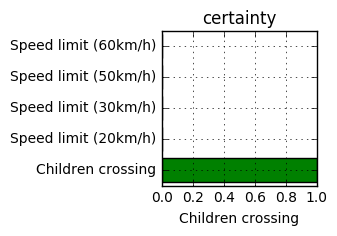

In [75]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
print('Check certainty for each prediction')
from pylab import *
top_five = tf.nn.top_k(y_pred, k=5, sorted=True, name=None)
pos_k5 = arange(5)+.5    # the bar centers on the y axis
i_k5 = np.random.randint(1,len(X_new))
k5 = sess.run([top_five], feed_dict={x:X_new[i_k5-1:i_k5]})
#pic = np.argmax(y_test[i_k5-1:i_k5],axis=1)
k_five = [sign_name[k5[0][1][-1][0]],
          sign_name[k5[0][1][-1][1]],
          sign_name[k5[0][1][-1][2]],
          sign_name[k5[0][1][-1][3]],
          sign_name[k5[0][1][-1][4]]]

figure(111,figsize = (2,2))
barh(pos_k5,k5[0][0][-1], align='center',color='green')
#yticks(pos_k5,k5[0][1][-1],)
yticks(pos_k5,k_five)
xlabel(sign_name[y_new[i_k5-1]])
title('certainty')
grid(True)

show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**
Most of the time, the model makes prediction with high certainty, over 90%. 

"Pedestrians" is a hard one to predict, the model is confused with speed limit signs. I am not sure the picture I got is a legal traffic sign, if it is a legal one, it need change later. 

"No entry" sign is confused with "no passing". Again, one circle and one strick at different angle, it does not tell a long story. 

Anyway, this simple model did quite well to predict signs with provided testset. I think there are two ways to improve it:
1. Increate the training set, collect as many situation as possible. 
2. Discovery other system to recognize the sence, rather than just read a single sign.  

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**
In this project, I just searched google image and grabed some pictures. Crop it out and label it as showing above. 
For future work, it is possible to have more work done as following:
1. Stream video from onboard cameras
2. Reinforce learning
3. Unsupervised learning
4. Understand the sence

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.